In [ ]:
#단층 퍼셉트론
#한계: XOR 게이트 구현 X

#AND 게이트 실습
#두개의 입력값이 모두 1인 경우에만 1 출력
#실습값 (0.5,0.5,-0.7)
def AND_gate(x1,x2):
  w1 =0.5
  w2=0.5
  b=-0.7
  result = x1*w1 +x2*w2 +b
  if result <=0:
    return 0
  else:
    return 1

In [ ]:
AND_gate(0,0),AND_gate(0,1),AND_gate(1,0),AND_gate(1,1)

(0, 0, 0, 1)

In [ ]:
#NAND gate
#두개의 입력값이 모두 1인 경우에만 0, 나머지 입력값에 대해서는 1이나오는 (AND gate와 반대)
#AND gate를 충족하는 가중치와 편향값에 (-)붙이기
#실습값 [-0.5,-0.5,0.7]

def NAND_gate(x1,x2):
  w1=-0.5
  w2=-0.5
  b=0.7
  result=x1*w1 + x2*w2 +b
  if result <=0:
    return 0
  else:
    return 1




In [ ]:
NAND_gate(0,0),NAND_gate(0,1),NAND_gate(1,0),NAND_gate(1,1)

(1, 1, 1, 0)

In [ ]:
#OR gate
#두개의 입력값이 모두 0인 경우에만 출력값이 0
#[0.6,0.6,-0.5]

def OR_gate(x1,x2):
  w1=0.6
  w2=0.6
  b=-0.5
  result=x1*w1+x2*w2 +b
  if result <=0:
    return 0
  else:
    return 1

In [ ]:
OR_gate(0,0),OR_gate(0,1),OR_gate(1,0),OR_gate(1,1)

(0, 1, 1, 1)

In [ ]:
#다층퍼셉트론 (MLP) 구현
#XOR논리회로

def XOR_gate(x1,x2):
  S1=NAND_gate(x1,x2)
  S2=OR_gate(x1,x2)
  y=AND_gate(x1,x2)

<ipython-input-8-d2698240d78e>:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.array(x>0,dtype=np.int)


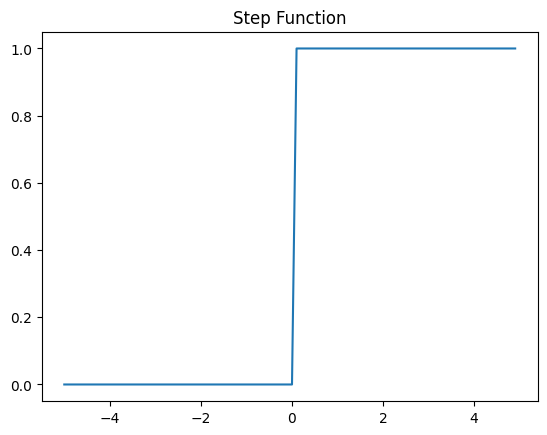

In [ ]:
#활성화 함수 실습

import numpy as np
import matplotlib.pyplot as plt
#계단함수
def step(x):
  return np.array(x>0,dtype=np.int)
x=np.arange(-5.0,5.0,0.1) #-5.0부터 5.0까지 0.1 간격 생성
y=step(x)
plt.title('Step Function')
plt.plot(x,y)
plt.show()

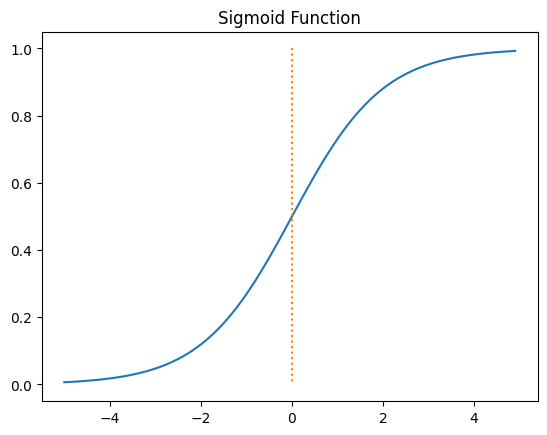

In [ ]:
#Sigmoid function 실습
def sigmoid(x):
  return 1/(1+np.exp(-x))
x=np.arange(-5.0,5.0,0.1)
y=sigmoid(x)

plt.plot(x,y)
plt.plot([0,0],[1.0,0.0],":") #가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

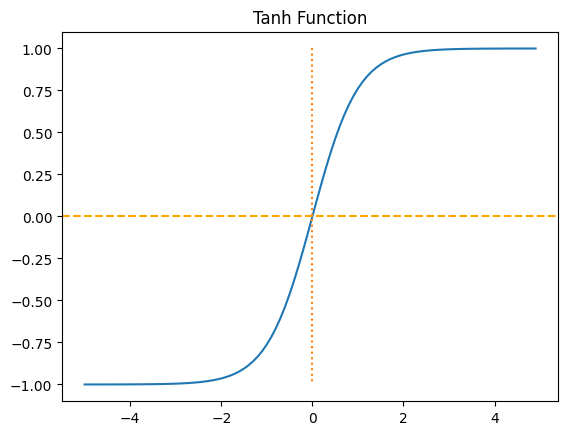

In [ ]:
#하이퍼볼릭탄젠트함수 (Hyperbolic tangent function)
x=np.arange(-5.0,5.0,0.1) #-5.0부터 5.0까지 0.1 간격 생성
y=np.tanh(x)

plt.plot(x,y)
plt.plot([0,0],[1.0,-1.0],':')
plt.axhline(y=0,color='orange',linestyle='--')
plt.title('Tanh Function')
plt.show()

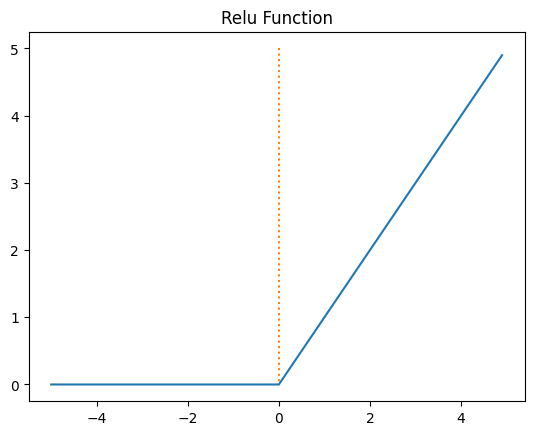

In [ ]:
#ReLu함수 (렐루 함수) 구현
def relu(x):
  return np.maximum(0,x)

x=np.arange(-5.0,5.0,0.1)
y=relu(x)

plt.plot(x,y)
plt.plot([0,0],[5.0,0.0],':')
plt.title('Relu Function')
plt.show()

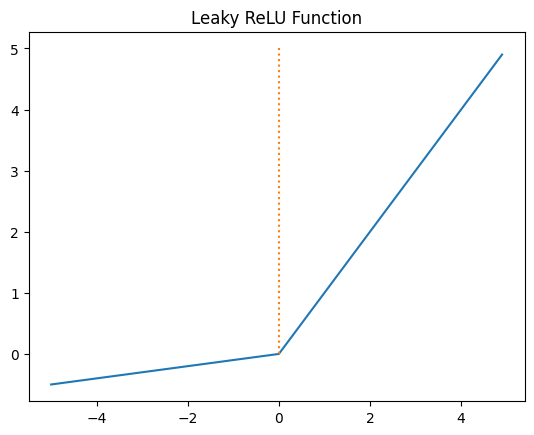

In [ ]:
#리키 렐루(Leaky ReLu)
#-> 죽은 렐루를 보완하기 위해 만들어진 ReLU변형 함수
#a : 하이퍼파라미터 (Leaky'새는'정도를 결정, 일반적으로 0.01의 값)
#이처럼 입력값이 음수라도 기울기가 0이 되지 않으면 ReLU는 죽지않음

a=0.1
def leaky_relu(x):
  return np.maximum(a*x,x)

x=np.arange(-5.0,5.0,0.1)
y=leaky_relu(x)

plt.plot(x,y)
plt.plot([0,0],[5.0,0.0],':')
plt.title('Leaky ReLU Function')
plt.show()


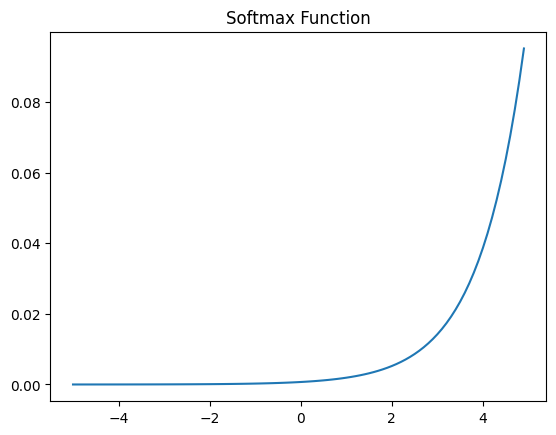

In [ ]:
#소프트맥스 함수 (Softmax function)

x=np.arange(-5.0,5.0,0.1)
y=np.exp(x) /np.sum(np.exp(x))

plt.plot(x,y)
plt.title('Softmax Function')
plt.show()

In [ ]:
#행렬곱으로 순전파 이해하기

#인공신경망 구현
#3개의 입력층 & 2개의 출력층
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

#3개의 입력과 2개의 출력
#소프트맥스 회귀 -> 다중클래스 분류
model.add(Dense(2, input_dim=3,activation='softmax'))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 8         
                                                                 
Total params: 8 (32.00 Byte)
Trainable params: 8 (32.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


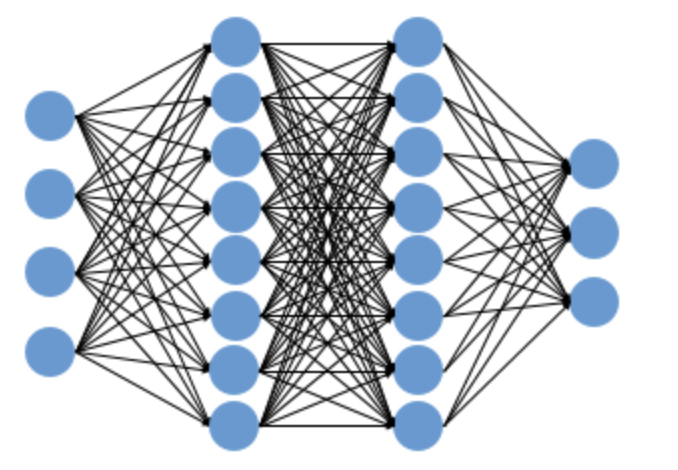

In [ ]:
#위의 인공신경망 코드로 구현해보기
#행령곱으로 다층 퍼셉트론의 순전파 이해하기
#인공 신경망 케라스로 구현하기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model=Sequential()

#4개의 입력과 8개의 출력
#0층에서
#출력층, 입력 차원의 수, 활성화 함수
model.add(Dense(8 , input_dim = 4, activation='relu')) #활성화 함수 -> 렐루 함수

#1층에서
#이어서 8개의 출력
model.add(Dense(8,activation='relu'))

#이어서 3개의 출력
model.add(Dense(3,activation='relu'))

In [ ]:
##드롭 아웃 실습
#인공신경망 구현과정 -> 드롭아웃 적용

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense

max_words =10000
num_classes=46

model =Sequential()
model.add(Dense(256,input_shape=(max_words,),activation='relu'))
model.add(Dropout(0.5)) #드롭아웃 추가, 50%비율
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5)) #드롭아웃 추가. 비율 50%
model.add(Dense(num_classes,activation='softmax'))

In [ ]:
#Keras 훑어보기
##1. 전처리 (Proprocessing)

#Tokenizer(): 토큰화 정수 인코딩을 위해 사용
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer=Tokenizer()
train_text="The earth is an awesome place live"

#단어 집합 생성
tokenizer.fit_on_texts([train_text])

#정수 인코딩
sub_text="The earth is and great place live"
sequences = tokenizer.texts_to_sequences([sub_text])[0]

print("정수 인코딩 :",sequences)
print("단어 집합 :",tokenizer.word_index)

정수 인코딩 : [1, 2, 3, 6, 7]
단어 집합 : {'the': 1, 'earth': 2, 'is': 3, 'an': 4, 'awesome': 5, 'place': 6, 'live': 7}


정수 인코딩 : [1, 2, 3, 6, 7]
단어 집합 : {'the': 1, 'earth': 2, 'is': 3, 'an': 4, 'awesome': 5, 'place': 6, 'live': 7}

=> 코드결과 해석
great는 단어집합 (vocabulary)에 없으므로 출력 X

In [ ]:
##Keras_preprocessing
#ped_sequence(): 전체 훈련 데이터에서 각 샘플의 길이를 동일하게 맞춰주는 것 = padding(패딩)
#-> 정해준 길이보다 길이가 긴 샘플은 값을 일부 자르고, 정해준 길이보다 길이가 짧은 샘플은 값을 0으로 채워줌
pad_sequences([[1,2,3],[3,4,5,6],[7,8]],maxlen=3,padding='pre')

array([[1, 2, 3],
       [4, 5, 6],
       [0, 7, 8]], dtype=int32)

array([[1, 2, 3],
       [4, 5, 6],
       [0, 7, 8]], dtype=int32)

=> 코드결과 해석
- 첫번째 인자 = 패딩을 진행할 데이터
- maxlen = 모든 데이터에 대해서 정규화 할 길이
- padding
  * pre : 앞에 0을 채움
  * post : 뒤에 0을 채움

In [ ]:
# ##2. Keras_Word Embedding
# #word Embedding : 텍스트 내의 단어들을 밀집 벡터로 만드는 것 cf. 원 - 핫 벡터
# #원-핫 벡터 : 벡터의 차원이 큼, 단어 벡터 간의 유의미한 유사도 구할 수 X

# #워드 임베딩 벡터 : 저차원 벡터를 가짐, 모든 원소 값 = 실수
# #밀집 벡터 = 임베딩 벡터 (embeding vector)

# #Embedding() : 임베딩 층을 만드는 역할
# #정수 인코딩이 된 단어들을 입력을 받아 임베딩 수행
# #Embedding()은 2D 정수 텐서 입력 -> 워드 임베딩 작업 수행 -> 3D 텐서 리턴

# ###presudo-code

# #1. 토큰화
# tokenized_text = [['Hope', 'to', 'see', 'you', 'soon'], ['Nice', 'to', 'see', 'you', 'again']]

# #2. 각 단어에 대한 정수 인코딩
# encoded_text = [[0,1,2,3,4],[5,1,2,3,6]]

# #3. 위 정수 인코딩 데이터가 아래의 임베딩 층의 입력이 된다.
# vocab_size=7
# embedding_dim=2
# Embedding(vocab_size, embedding_dim,input_length=5)

# # 각 정수는 아래의 테이블의 인덱스로 사용되며 Embedding()은 각 단어마다 임베딩 벡터를 리턴한다.
# +------------+------------+
# |   index    | embedding  |
# +------------+------------+
# |     0      | [1.2, 3.1] |
# |     1      | [0.1, 4.2] |
# |     2      | [1.0, 3.1] |
# |     3      | [0.3, 2.1] |
# |     4      | [2.2, 1.4] |
# |     5      | [0.7, 1.7] |
# |     6      | [4.1, 2.0] |
# +------------+------------+

# # 위의 표는 임베딩 벡터가 된 결과를 예로서 정리한 것이고 Embedding()의 출력인 3D 텐서를 보여주는 것이 아님.

Embedding()의 대표적인 인자
- 첫번째 인자 = 단어 집합의 크기, 즉 총 단어의 개수
- 두번째 인자 = 임베딩 벡터의 출력 차원. 결과로서 나오는 임베딩 벡터의 크기
- input_length = 입력 시퀀스의 길이

In [ ]:
##Keras_Modeling
#Sequential() : 인공신경망의 각 층을 구성하기 위한 것
#Sequential()을 모델로 선언한 뒤 model.add()를 통해 단계적으로 추가

#ex
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
# model.add(...) #층 추가 (층이름 기재)
# model.add(...) #층 추가 (층이름 기재)
# model.add(...) #층 추가 (층이름 기재)
# model.add(...) #층 추가 (층이름 기재)

In [ ]:
# #Embedding()을 통해 생성하는 임베딩 층 (embedding layer)를 추가하는 예시

# model=Sequential()
# model.add(Embedding(vocab_size,output_dim,input_length))

In [ ]:
#전결합층(fully-connected layer)을 추가하는 예시
model=Sequential()
model.add(Dense(1,input_dim=3,activation='relu'))

Dense()의 대표적인 인자
- 첫번째 인자 = 출력 뉴런의 수
- input_dim = 입력 뉴런의 수 (입력의 차원)
- activiation = 활성화 함수
  - linear : 입력 뉴런과 가중치의 계산결과 그대로 출력
  - sigmoid : 이진 분류 문제에서 출력층에 주로 사용되는 활성화 함수
  - softmax : 셋 이상의 선택지 중 하나를 택하는 다중 클래스 분류 문제에서 출력층에 주로 사용되는 활성화 함수
  - relu : 은닉층에 주로 사용되는 활성화 함수

In [ ]:
#전결합층 1개 더 생성
model=Sequential()
model.add(Dense(8,input_dim=4,activation='relu')) #은닉층
model.add(Dense(1, activation='sigmoid')) #출력층, input_dim이 없는 이유 = 이미 이전 층의 뉴런 수가 8개임을 알고 있기 때문.

In [ ]:
##summary (): 모델의 정보를 요약해서 보여줌
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 8)                 40        
                                                                 
 dense_9 (Dense)             (None, 1)                 9         
                                                                 
Total params: 49 (196.00 Byte)
Trainable params: 49 (196.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
##keras_compile컴파일 & 훈련 training
#compile(): 모델을 기계가 이해할 수 있도록 컴파일함
#손실함수와 옵티마이저, 메트릭 함수 선택
!pip install tensorflow
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential

vocab_size=10000
embedding_dim=32
hidden_units=32

model=Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(SimpleRNN(hidden_units))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])

compile(): 모델을 기계가 이해할 수 있도록 컴파일하는 과정
- optimizer = 훈련 과정을 설정하는 옵티맘이저 설정
- loss = 훈련 과정에서 사용할 손실함수 (loss function) 설정
- metrics = 훈련을 모니터링하기 위한 지표 선택

In [ ]:
#fit(): 모델을 학습함. 모델이 오차로부터 매개 변수를 업데이트 시키는 과정 = 학습, 훈련, 적합
#위의 compile()코드의 연장선상인 코드
#X_trian,y_train,epochs=10,batch_size=32,verbose=0,validation_split=0.2)

model.fit(X_trian,y_train,epochs=10,batch_size=32,verbose=0,validation_split=0.2)
- 첫번째 인자 = 훈련 데이터
- 두번째 인자 = 지도 학습에서 레이블 데이터에 해당
- epochs = 에포크. 총 훈련횟수
- batch_size = 배치크기
- validation_data(x_val,y_val) = 검증데이터(validation data)사용 -> 검증데이터의 오차가 낮아지다가 높아지기 시작하면 이는 과적합의 신호임.
- validation_split = 검증데이터를 사용하기 위한 용도로 validation_data대신 사용가능.
- verbose = 학습 중 출력되는 문구 설정
  - 0 : 아무것도 출력 X
  - 1 : 훈련의 진행도를 보여주는 진행 막대 보여줌
  - 2 : 미니 배치마다 손실 정보를 출력


In [ ]:
##Keras_평가 Evaluation와 예측 Prediction
#evaluate
# model.evaluate(X_test,y_test,batch_size=32)

model.evaluate(X_test,y_test,batch_size=32)
- 첫번째 인자 = 테스트 데이터
- 두번째 인자 = 지도 학습에서 레이블 테스트 데이터에 해당
- batch_size = 배치 크기

In [ ]:
#predict():임의의 입력에 대한 모델의 출력값 확인
#model.predict(X_input, batch_size=32)

- 첫번째 인자 = 예측하고자 하는 데이터
- batch_size = 배치 크기

In [ ]:
### 모델의 저장 (SAVE)과 로드 (Loda)
#save():인공 신경망 모델을 hdf5 파일에 저장
#model.save("model_name.h5")

#lodad_model(): 저장해둔 모델 불러오기
# from tensorflow.keras.models import load_model
# model=load_model("model_name.h5")

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model=Sequential()
model.add(Dense(3,input_dim=4,activation='softmax'))

In [ ]:
#Functional API로 만든 모델
#Functional API는 입력의 크기를 명시한 입력층을 모델의 앞단에 정의해야함

#1. 전결합 피드 포워드 신경망 Fully-connected FFNN
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

#입력 데이터의 크기 shape을 명시
inputs=Input(shape=(10,))

#은닉층과 출력층 추가,
#이전층을 다음층 함수의 입력으로 사용하고, 변수에 할당
hidden1=Dense(64,activation='relu')(inputs) #은닉층 추가
hidden2=Dense(64,activation='relu')(hidden1)
output=Dense(1,activation='sigmoid')(hidden2) #출력층 추가

#위 코드를 하나의 모델로 구성 -> model에 입력과 출력을 정의
model =Model(inputs=inputs,outputs=output)

#이를 모델로 저장하면 sequential API를 사용할때와 마찬가지로 model.comile, model.fit등 사용 가능해짐
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
#변수명을 달리하여 FFNN(순방향) 생성
#은닉층과 출력층의 변수를 x로 통일

inputs=Input(shape=(10,))
x = Dense(8,activation='relu')(inputs)
x= Dense(4, activation='relu')(x)
x=Dense(1,activation='linear')(x)
model=Model(inputs,x)

In [ ]:
#2. Linear Regression Functional API로 구현
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model

X=[1,2,3,4,5,6,7,8,9] #공부하는 시간
y=[11,22,33,44,53,66,77,87,95] #각 공부하는 시간에 맵핑되는 성적

inputs =Input(shape=(1,))
output = Dense(1,activation='linear')(inputs)
linear_model = Model(inputs, output)

sgd = optimizers.SGD(lr=0.01)

linear_model.compile(optimizer=sgd, loss='mse', metrics =['mse'])
linear_model.fit(X,y,epochs=300)

Epoch 1/300
1/1 [==============================] - 1s 1s/step - loss: 3667.8750 - mse: 3667.8750
Epoch 2/300
1/1 [==============================] - 0s 14ms/step - loss: 452.3700 - mse: 452.3700
Epoch 3/300
1/1 [==============================] - 0s 17ms/step - loss: 56.7252 - mse: 56.7252
Epoch 4/300
1/1 [==============================] - 0s 11ms/step - loss: 8.0430 - mse: 8.0430
Epoch 5/300
1/1 [==============================] - 0s 11ms/step - loss: 2.0519 - mse: 2.0519
Epoch 6/300
1/1 [==============================] - 0s 11ms/step - loss: 1.3136 - mse: 1.3136
Epoch 7/300
1/1 [==============================] - 0s 11ms/step - loss: 1.2217 - mse: 1.2217
Epoch 8/300
1/1 [==============================] - 0s 10ms/step - loss: 1.2093 - mse: 1.2093
Epoch 9/300
1/1 [==============================] - 0s 11ms/step - loss: 1.2067 - mse: 1.2067
Epoch 10/300
1/1 [==============================] - 0s 15ms/step - loss: 1.2054 - mse: 1.2054
Epoch 11/300
1/1 [==============================] - 0s 11ms

In [ ]:
#로지스틱 회귀 구현
from tensorflow.keras.layers import Input,Dense
from tensorflow.keras.models import Model

inputs=Input(shape=(3,))
output=Dense(1,activation='sigmoid')(inputs)
logistic_model=Model(inputs,output)

In [ ]:
#다중입력을 받는 모델 funtional API로 구현
#최종 완성된 다중입력, 다중출력 모델의 예시
#model =Model(inputs=[a1,a2],outputs=[b1,b2,b3])

from tensorflow.keras.layers import Input,Dense,concatenate
from tensorflow.keras.models import Model

#두개의 입력층으로부터 분기되어 진행된 후 마지막에 하나의 출력을 예측하는 모델 구현
#두개의 입력층을 정의
inputA=Input(shape=(64,))
inputB=Input(shape=(128,))

#첫번째 입력층으로부터 분기되어 진행되는 인공 신경망을 정의
x=Dense(16,activation='relu')(inputA)
x=Dense(8,activation='relu')(x)
x=Model(inputs=inputA,outputs=x)

#두번째 입력층으로부터 분기되어 진행되는 인공 신경망을 정의
y=Dense(64,activation='relu')(inputB)
y=Dense(32,activation='relu')(y)
y=Dense(8,activation='relu')(y)
y=Model(inputs=inputB,outputs=y)

#두개의 인공 신경망의 출력을 연결(concatenate)
result=concatenate([x.output,y.output])

z=Dense(2,activation='relu')(result)
z=Dense(1,activation='linear')(z)

model=Model(inputs=[x.input,y.input],outputs=z)

In [ ]:
#RNN(Recurrence Neural Network) 은닉층 사용하기
#하나의 특성(feature)에 50개의 시점(time-step)을 입력으로 받는 모델 설계

from tensorflow.keras.layers import Input,Dense,LSTM
from tensorflow.keras.models import Model

inputs=Input(shape=(50,1))
lstm_layer=LSTM(10)(inputs)
x=Dense(10,activation='relu')(lstm_layer)
output=Dense(1,activation='sigmoid')(x)

model=Model(inputs=inputs,outputs=output)

In [ ]:
#케라스 서브클래싱 API (Keras Subclassing)
#subclassing으로 구현한 linear regression

import tensorflow as tf
class LinearRegression(tf.keras.Model):
  def __init__(self):
    super(LinearRegression,self).__init__()
    self.linear_layer = tf.keras.layers.Dense(1,input_dim=1,activation='linear')
  def call(self,x):
    y_pred = self.linear_layer(x)

    return y_pred

model=LinearRegression()

X=[1,2,3,4,5,6,7,8,9] #공부하는 시간
y=[11,22,33,44,53,66,77,87,95] #각 공부하는 시간에 맵핑되는 성적

sgd=tf.keras.optimizers.SGD(lr=0.01)
model.compile(optimizer=sgd, loss ='mse',metrics=['mse'])
model.fit(X,y,epochs=300)

Epoch 1/300


ValueError: ignored

In [ ]:
#케라스의 texts_to_matrix() 이해하기
#keras의 전처리도구 -> Tokenizer import
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
texts = ['먹고 싶은 사과', '먹고 싶은 바나나', '길고 노란 바나나 바나나', '저는 과일이 좋아요']

In [ ]:
#정수 인코딩 수행
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
print(tokenizer.word_index)

{'바나나': 1, '먹고': 2, '싶은': 3, '사과': 4, '길고': 5, '노란': 6, '저는': 7, '과일이': 8, '좋아요': 9}


In [ ]:
#texts_to_matix() : 입력된 텍스트 데이터로부터 행렬을 만드는 도구
#4개의 모드 지원
#binary, count, freq, tfidf

print(tokenizer.texts_to_matrix(texts,mode='count')) #texts_to_matrix의 입력으로 texts를 넣고, 모드는 'count'

[[0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]]


In [ ]:
#binary mode 구현
#해당하는 단어의 유무에만 관심이 있음
#해당 단어 존재 1, 존재 X 0
print(tokenizer.texts_to_matrix(texts,mode='binary'))

[[0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]]


In [ ]:
#tfidf mode 구현
print(tokenizer.texts_to_matrix(texts,mode='tfidf').round(2))

[[0.   0.   0.85 0.85 1.1  0.   0.   0.   0.   0.  ]
 [0.   0.85 0.85 0.85 0.   0.   0.   0.   0.   0.  ]
 [0.   1.43 0.   0.   0.   1.1  1.1  0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.1  1.1  1.1 ]]


In [ ]:
#3. 20개 뉴스 그룹 (Twnety Newsgroups)데이터에 대한 이해
import pandas as pd

#사이킷런에서는 20개의 다른 주제를 가진 18,846개의 뉴스 그룹 이메일 데이터 제공
from sklearn.datasets import fetch_20newsgroups
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

In [ ]:
newsdata = fetch_20newsgroups(subset='train')
#subset의 값 all : 전체 데이터의 샘플 다운가능
#train : 훈련데이터
#test : 테스트 데이터

In [ ]:
#해당 데이터 속성 확인
print(newsdata.keys())

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

총 6개의 속성 존재
실제로 훈련에 사용할 속성 -> 이메일 본문 : data, 메일이 어떤 주제인지 기재된 숫자 레이블 :target

In [ ]:
print('훈련용 샘플의 개수 : {}'.format(len(newsdata.data)))

훈련용 샘플의 개수 : 11314


In [ ]:
#traget_names이 담고있는 주제의 이름 확인
print('총 주제의 개수 : {}'.format(len(newsdata.target_names)))
print(newsdata.target_names)

총 주제의 개수 : 20
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [ ]:
#실습의 목적 : 테스트 데이터에서 이메일 본문을 보고 20개의 주제 중 어떤 주제인지 맞추는 것.
#target에는 총 0~19 숫자 존재

#첫번째 샘플이 몇번 주제인지 확인
print('첫번째 샘플의 레이블 : {}'.format(newsdata.target[0]))

첫번째 샘플의 레이블 : 7


In [ ]:
#레이블 값이 실제로 어떤 주제를 나타내는지 -> target_names[레이블]
print('7번 레이블이 의미하는 주제 : {}'.format(newsdata.target_names[7]))

7번 레이블이 의미하는 주제 : rec.autos


In [ ]:
#첫번째 샘플의 본문 내용 확인
print(newsdata.data[0])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







In [ ]:
#훈련에 사용될 메일 본문인 data와 레이블인 target을 데이터 프레임으로 만들기
data=pd.DataFrame(newsdata.data, columns =['email'])
data['target'] = pd.Series(newsdata.target)
data[:5]

,email,target
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14


In [ ]:
#news열 : 문자열, target열은 정수형
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11314 entries, 0 to 11313
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   11314 non-null  object
 1   target  11314 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 176.9+ KB


In [ ]:
#Null값을 가진 샘플이 있는지 확인
data.isnull().values.any()

False

In [ ]:
#nunique(): 샘플 중 중복을 제거한 개수를 확인
print('중복을 제외한 샘플의 수 : {}'.format(data['email'].nunique()))
print('중복을 제외한 주제의 수 : {}'.format(data['target'].nunique()))

중복을 제외한 샘플의 수 : 11314
중복을 제외한 주제의 수 : 20


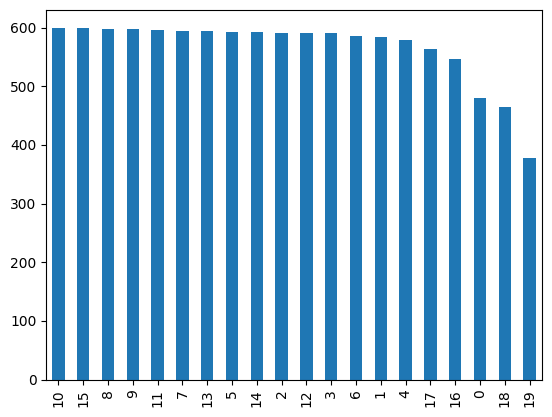

In [ ]:
#레이블 값의 분포를 시각화
data['target'].value_counts().plot(kind='bar');

In [ ]:
#데이터프레임으로부터 다시 메일 본문과 레이블을 분리
print(data.groupby('target').size().reset_index(name='count'))

    target  count
0        0    480
1        1    584
2        2    591
3        3    590
4        4    578
5        5    593
6        6    585
7        7    594
8        8    598
9        9    597
10      10    600
11      11    595
12      12    591
13      13    594
14      14    593
15      15    599
16      16    546
17      17    564
18      18    465
19      19    377


In [ ]:
#훈련 데이터와 테스트 데이터의 본문과 레이블을 각각 저장
newsdata_test=fetch_20newsgroups(subset='test',shuffle=True)
train_email=data['email']
train_label=data['target']
test_email=newsdata_test.data
test_label=newsdata_test.target

In [ ]:
vocab_size=10000 #실습에서 사용할 최대 단어 개수, 빈도수가 가장 높은 상위 vocab_size개수만큼의 단어를 사용
num_classes=20

In [ ]:
#전처리 수행 함수 : prepare_data
#토크나이저를 통해 단어 토큰화 수행

def prepare_data(train_data,test_data,mode): #전처리 함수
    tokenizer=Tokenizer(num_words = vocab_size) #vocab_size 개수 만큼의 단어만 사용한다.
    tokenizer.fit_on_texts(train_data)
    X_train = tokenizer.texts_to_matrix(train_data,mode=mode) #샘플 수 X, vocab_size 크기의 행렬 생성
    X_test=tokenizer.texts_to_matrix(test_data, mode=mode) #샘플 수 X, vocab_size 크기의 행렬 생성
    return X_train, X_test, tokenizer.index_word

In [ ]:
#texts_to_matix()를 사용하여 훈련 데이터와 테스트 데이터를 binary모드로 변환
#메일 본문 -> 'binary'모드로 변환
#훈련 데이터와 테스트 데이터의 레이블은 원-핫 인코딩 수행
X_train, X_test, index_to_word = prepare_data(train_email, test_email, 'binary') #binary 모드로 변환
y_train = to_categorical(train_label,num_classes) #원-핫 인코딩
y_test=to_categorical(test_label,num_classes) #원-핫 인코딩

In [ ]:
print('훈련 샘플 본문의 크기 : {}'.format(X_train.shape))
print('훈련 샘플 레이블의 크기 : {}'.format(y_train.shape))
print('테스트 샘플 본문의 크기 : {}'.format(X_test.shape))
print('테스트 샘플 본문의 크기 : {}'.format(y_test.shape))

훈련 샘플 본문의 크기 : (11314, 10000)
훈련 샘플 레이블의 크기 : (11314, 20)
테스트 샘플 본문의 크기 : (7532, 10000)
테스트 샘플 본문의 크기 : (7532, 20)


In [ ]:
print('빈도수 상위 1번 단어: {}'.format(index_to_word[1]))
print('빈도수 상위 9999번 단어 : {}'.format(index_to_word[9999]))

빈도수 상위 1번 단어: the
빈도수 상위 9999번 단어 : mic


In [ ]:
#다층 퍼셉트론 (Multilayer Perceptron, MLP) 사용하여 텍스트 분류하기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

#다층 퍼셉트론 설계
#총 4개의 층
#은닉층이 두개이므로 DNN
def fit_and_evaluate(X_train, y_train, X_test, y_test): #모델설계
    model = Sequential()
    model.add(Dense(256,input_shape=(vocab_size,),activation='relu'))
    model.add(Dropout(0.5)) #과적합 방지 드롭아웃
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes,activation='softmax')) #다중클래스 문제 -> 소프트 맥스 함수 사용

    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy']) #손실함수로는 크로스 엔트로피 함수
    model.fit(X_train, y_train, batch_size=128, epochs=5, verbose=1,validation_split=0.1)
    score=model.evaluate(X_test, y_test, batch_size=128, verbose=0)
    return score[1]

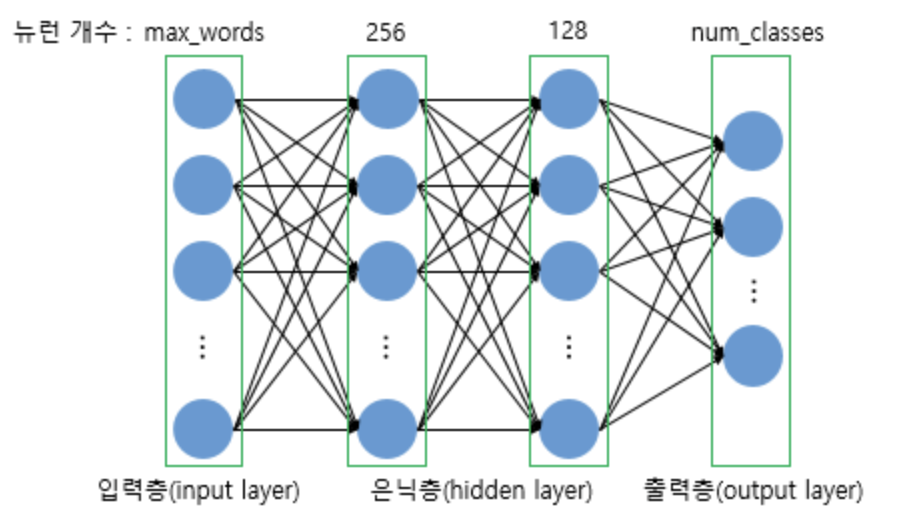

In [ ]:
#texts_to_matrix() 4개의 모드에 대해서 전부 모델 결과 확인
modes=['binary','count','tfidf','freq'] #4개의 모드를 리스트에 저장.

for mode in modes: #4개의 모드에 대해서 각각 아래의 작업을 반복
    X_train, X_test, _ = prepare_data(train_email,test_email,mode) #모드에 따라서 데이터를 전처리
    score=fit_and_evaluate(X_train, y_train, X_test, y_test) #모델을 훈련하고 평가.
    print(mode+'모드의 테스트 정확도:',score)

Epoch 1/5
80/80 [==============================] - 7s 76ms/step - loss: 2.2764 - accuracy: 0.3397 - val_loss: 0.9764 - val_accuracy: 0.8260
Epoch 2/5
80/80 [==============================] - 5s 57ms/step - loss: 0.8554 - accuracy: 0.7631 - val_loss: 0.4445 - val_accuracy: 0.8852
Epoch 3/5
80/80 [==============================] - 5s 57ms/step - loss: 0.4389 - accuracy: 0.8852 - val_loss: 0.3435 - val_accuracy: 0.9037
Epoch 4/5
80/80 [==============================] - 5s 68ms/step - loss: 0.2521 - accuracy: 0.9348 - val_loss: 0.3004 - val_accuracy: 0.9064
Epoch 5/5
80/80 [==============================] - 4s 56ms/step - loss: 0.1753 - accuracy: 0.9566 - val_loss: 0.2984 - val_accuracy: 0.9064
binary모드의 테스트 정확도: 0.8248804807662964
Epoch 1/5
80/80 [==============================] - 9s 78ms/step - loss: 2.7827 - accuracy: 0.2388 - val_loss: 1.6442 - val_accuracy: 0.7403
Epoch 2/5
80/80 [==============================] - 5s 57ms/step - loss: 1.4147 - accuracy: 0.6334 - val_loss: 0.7116 - val

In [ ]:
2

In [ ]:
#케라스로 RNN 구현하기
from tensorflow.keras.layers import SimpleRNN
model.add(SimpleRNN())